# Feature Engineering

## categorical values

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [2]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [7]:


cv = CountVectorizer()

X = cv.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [5]:
import pandas as pd

pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
# Use better vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Derived Features

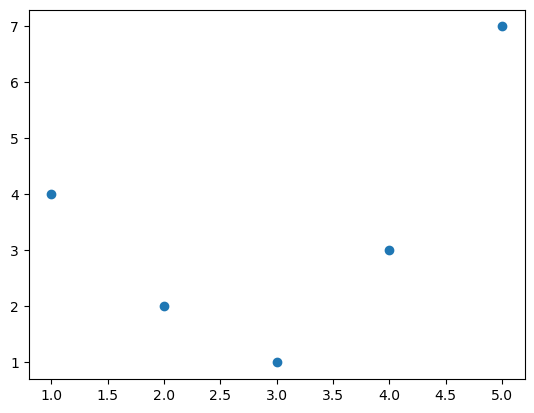

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);


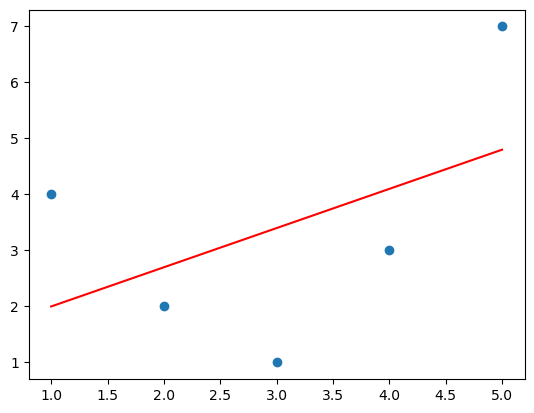

In [12]:
# Try fitting a linear model to above data
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X = x[:, np.newaxis]
reg.fit(X, y)
yfit = reg.predict(X)

plt.scatter(x, y)
plt.plot(x, yfit, color='red')

In [14]:
# results into a poor fit, transform the data ....
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


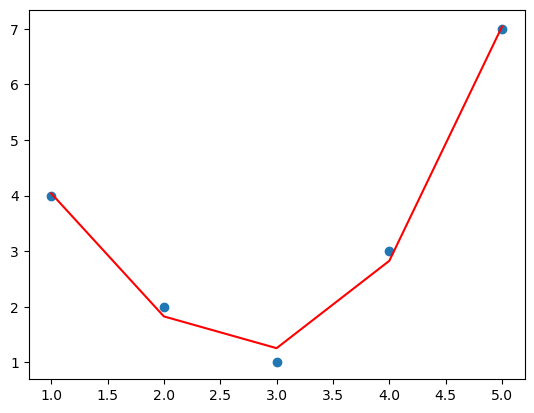

In [15]:
# get linear model for the above...
reg.fit(X2, y)
yfit2 = reg.predict(X2)

plt.scatter(x, y)
plt.plot(x, yfit2, color='red')

### Imputing data

In [16]:
from numpy import nan

X = np.array([[nan, 0, 3],
              [3, 7, 9],
              [3, 5, 2],
              [4, nan, 6],
              [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [18]:
# Using mean to fill nan.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=nan, strategy='mean')

X2 = imputer.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [20]:
model = LinearRegression()
model.fit(X2, y)
yfit = model.predict(X2)
yfit

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature pipeline

In [21]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression())

In [23]:
pipeline.fit(X, y)
yfit = pipeline.predict(X)
print(yfit)
print(y)

[14. 16. -1.  8. -5.]
[14 16 -1  8 -5]
